In [1]:
import sys
from google.colab import drive
drive.mount('/content/gdrive/')
sys.path.append('/content/gdrive/MyDrive/data')

Mounted at /content/gdrive/


In [60]:
SYSPATH = '/content/gdrive/MyDrive/data/' 
STOP_WORDS = SYSPATH + 'stopwords.txt'
import pandas as pd
from collections import defaultdict
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [9]:
content = pd.read_csv(SYSPATH + 'train.csv')
# get sentence length
content['sentence_len'] = content['sentence'].apply(len)

In [22]:
np.max(content['sentence_len'])

145

In [11]:
np.mean(content['sentence_len'])

22.13124062968516

In [12]:
np.std(content['sentence_len'])

7.3097918579505325

(array([2.200e+01, 6.210e+02, 2.313e+03, 4.475e+03, 5.769e+03, 6.698e+03,
        6.917e+03, 4.824e+03, 7.290e+03, 9.416e+03, 2.974e+03, 9.350e+02,
        5.870e+02, 3.000e+02, 1.140e+02, 4.600e+01, 3.500e+01, 1.000e+01,
        6.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,   4.86,   7.72,  10.58,  13.44,  16.3 ,  19.16,  22.02,
         24.88,  27.74,  30.6 ,  33.46,  36.32,  39.18,  42.04,  44.9 ,
         47.76,  50.62,  53.48,  56.34,  59.2 ,  62.06,  64.92,  67.78,
         70.64,  73.5 ,  76.36,  79.22,  82.08,  84.94,  87.8 ,  90.66,
         93.52,  96.38,  99.24, 102.1 , 104.96, 107.82, 110.68, 113.54,
        116.4 , 

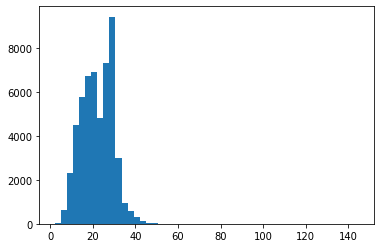

In [17]:
plt.hist(content['sentence_len'], bins=50)

In [19]:
# cut sentence into word
def cut_sentence(sentence): 
  return ' '.join(list(jieba.cut(sentence)))

content['words'] = content['sentence'].apply(lambda sentence: cut_sentence(sentence))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.003 seconds.
Prefix dict has been built successfully.


In [39]:
stop_words =  open(STOP_WORDS, encoding='gbk').read().split()

In [63]:
def remove_stopwords(sentence):
  sentence_remove = []
  for word in sentence.split(' '):
    if word not in stop_words:
      sentence_remove.append(word)
  return ' '.join(sentence_remove)  

In [64]:
content['word_clean'] = content['words'].apply(remove_stopwords)

In [ ]:
sentences = content['word_clean'].tolist()
sentences = list(map(lambda s: s.split(), sentences))
from functools import reduce
all_words = reduce(lambda a, b: a + b, sentences)
words_count = Counter(all_words)

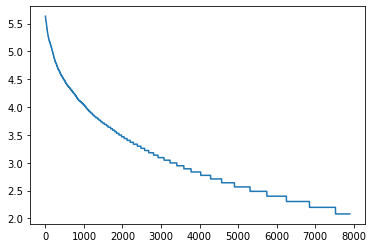

In [74]:
plt.plot(list(map(lambda n: np.log(n), sorted(words_count.values(), reverse=True)[100:8000])))

In [77]:
corpus = content['word_clean'].values
common_word = [w for w, _ in sorted(words_count.items(), key=lambda kv: kv[1], reverse=True)[:100]]

stop_words_size = 100
WORDS_LONG_TAIL_BEGIN = 8000
WORDS_SIZE = WORDS_LONG_TAIL_BEGIN - stop_words_size

tfidf = TfidfVectorizer(max_features=WORDS_SIZE, stop_words=common_word)
text_vectors = tfidf.fit_transform(corpus)
print(text_vectors.shape)

targets = content['label']

x_train, x_test, y_train, y_test = train_test_split(text_vectors, targets, test_size=0.2, random_state=0)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

(53360, 7900)


0.485476011994003

In [81]:
accuracy_score(rf.predict(x_test), y_test)

0.485476011994003

In [80]:
recall_score(rf.predict(x_test), y_test, average='weighted')

0.485476011994003

In [83]:
precision_score(rf.predict(x_test), y_test, average='weighted')

0.4919691234285343

In [82]:
f1_score(rf.predict(x_test), y_test, average='weighted')

0.48446919889126755